<a href="https://colab.research.google.com/github/luciabarg/datos_tumoresferas/blob/main/SDV_sinteticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to the SDV!

The Synthetic Data Vault (SDV) is a Python library designed to be your one-stop shop for creating tabular synthetic data.

In this notebook, we'll demo the basic features of SDV to get you started with creating synthetic data.

# 0. Installation

Install the SDV library.

In [ ]:
#%pip install sdv

<font color="maroon"><b>IMPORTANT!</b> When this is finished, <b>please restart the runtime</b> by clicking on Runtime, and then Restart runtime in the top menu bar.</font>

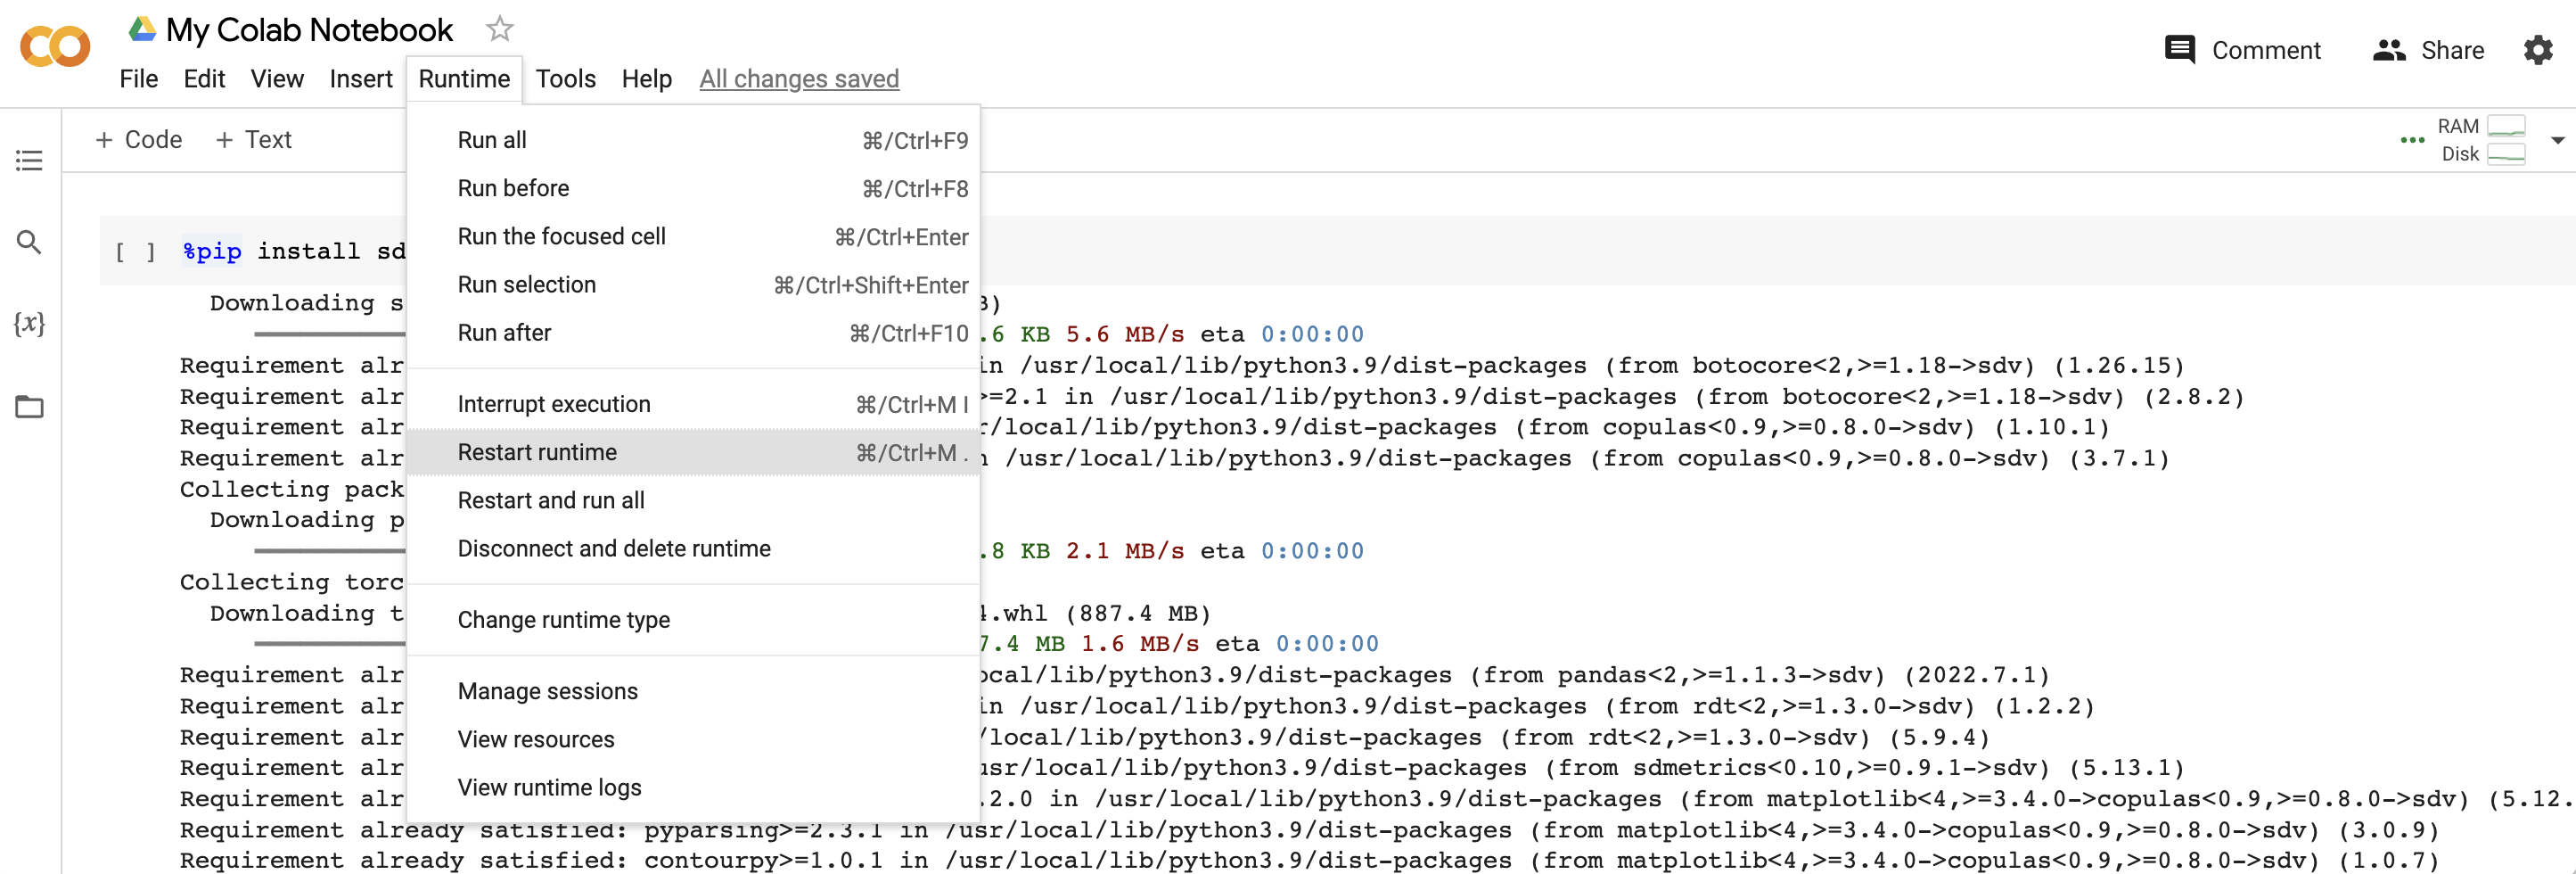

# 1. Loading the data

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
real_data = pd.read_csv(url)
print('cantidad de datos:', len(real_data))
real_data.drop(['X', 'Y', 'XM',"YM", "BX", "BY", "FeretX", "FeretY",  'Width', 'Height', 'FeretAngle'], axis=1, inplace=True)
real_data.head()

cantidad de datos: 1018


,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_1_100X_1_blob_1,324.4440,67.3603,0.8985,22.2117,19.7011,1.0653,0.9387,0.9500,si,0,20.95640,1.491357
1,Esferas_BT474_dia_0_well_1_100X_1_blob_2,497.5115,82.8004,0.9119,26.8751,25.1289,1.0475,0.9546,0.9569,si,0,26.00200,2.848733
2,Esferas_BT474_dia_0_well_1_100X_1_blob_3,282.9078,62.1586,0.9201,20.4370,18.3424,1.0395,0.9620,0.9519,si,0,19.38970,1.181258
3,Esferas_BT474_dia_0_well_1_100X_1_blob_5,500.7421,84.5571,0.8801,26.6336,25.1359,1.0278,0.9730,0.9493,si,0,25.88475,2.810370
4,Esferas_BT474_dia_0_well_1_100X_1_blob_6,492.8964,82.0728,0.9195,26.2232,24.4565,1.0186,0.9817,0.9643,si,0,25.33985,2.636596


In [ ]:
dia_ch = 3
dia_df_si = real_data[(real_data['dia'].isin([3, 5])) & (real_data['Esferoide']=='si')].copy()
dia_df_si.shape

(46, 13)

In [ ]:
dia_df_si['dia'].value_counts()

5    28
3    18
Name: dia, dtype: int64

In [ ]:
real_data = dia_df_si.copy()

In [ ]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=real_data)

In [ ]:
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "labels": {
            "sdtype": "categorical"
        },
        "Area": {
            "sdtype": "numerical"
        },
        "Perim.": {
            "sdtype": "numerical"
        },
        "Circ.": {
            "sdtype": "numerical"
        },
        "Feret": {
            "sdtype": "numerical"
        },
        "MinFeret": {
            "sdtype": "numerical"
        },
        "AR": {
            "sdtype": "numerical"
        },
        "Round": {
            "sdtype": "numerical"
        },
        "Solidity": {
            "sdtype": "numerical"
        },
        "Esferoide": {
            "sdtype": "categorical"
        },
        "dia": {
            "sdtype": "numerical"
        },
        "Diameter": {
            "sdtype": "numerical"
        },
        "n_diam": {
            "sdtype": "numerical"
        }
    }
}

In [ ]:
metadata.update_column(
    column_name='labels',
    sdtype='id')

In [ ]:
python_dict = metadata.to_dict()

In [ ]:
python_dict

{'METADATA_SPEC_VERSION': 'SINGLE_TABLE_V1',
 'columns': {'labels': {'sdtype': 'id'},
  'Area': {'sdtype': 'numerical'},
  'Perim.': {'sdtype': 'numerical'},
  'Circ.': {'sdtype': 'numerical'},
  'Feret': {'sdtype': 'numerical'},
  'MinFeret': {'sdtype': 'numerical'},
  'AR': {'sdtype': 'numerical'},
  'Round': {'sdtype': 'numerical'},
  'Solidity': {'sdtype': 'numerical'},
  'Esferoide': {'sdtype': 'categorical'},
  'dia': {'sdtype': 'numerical'},
  'Diameter': {'sdtype': 'numerical'},
  'n_diam': {'sdtype': 'numerical'}}}

In [ ]:
metadata.validate()

In [ ]:
metadata.set_primary_key(column_name='labels')

/usr/local/lib/python3.10/dist-packages/sdv/metadata/single_table.py:347: UserWarning: There is an existing primary key labels. This key will be removed.
  warnings.warn(


In [ ]:
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "primary_key": "labels",
    "columns": {
        "labels": {
            "sdtype": "id"
        },
        "Area": {
            "sdtype": "numerical"
        },
        "Perim.": {
            "sdtype": "numerical"
        },
        "Circ.": {
            "sdtype": "numerical"
        },
        "Feret": {
            "sdtype": "numerical"
        },
        "MinFeret": {
            "sdtype": "numerical"
        },
        "AR": {
            "sdtype": "numerical"
        },
        "Round": {
            "sdtype": "numerical"
        },
        "Solidity": {
            "sdtype": "numerical"
        },
        "Esferoide": {
            "sdtype": "categorical"
        },
        "dia": {
            "sdtype": "numerical"
        },
        "Diameter": {
            "sdtype": "numerical"
        },
        "n_diam": {
            "sdtype": "numerical"
        }
    }
}

# 2. Creating a synthesizer

An SDV **synthesizer** is an object that you can use to create synthetic data. It learns patterns from the real data and replicates them to generate synthetic data.

Let's use the `FAST_ML` preset synthesizer, which is optimized for performance.

In [ ]:
#from sdv.lite import SingleTablePreset

#synthesizer = SingleTablePreset(
#    metadata,
#    name='FAST_ML'
#)

Next, we can **train** the synthesizer. We pass in the real data so it can learn patterns using machine learning.

In [ ]:
#synthesizer.fit(
#    data=real_data
#)

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata,
                                        enforce_min_max_values=False)
synthesizer.fit(real_data)

/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'Circ.'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'AR'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'Round'. Data will not be rounded.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/rdt/transformers/numerical.py:112: UserWarning: No rounding scheme detected for column 'n_diam'. Data will not be rounded.
  warnings.warn(


Now the synthesizer is ready to use!

# 3. Generating synthetic data
Use the `sample` function and pass in any number of rows to synthesize.

In [ ]:
synthetic_data = synthesizer.sample(
    num_rows=100
)
synthetic_data.head()

,labels,Area,Perim.,Circ.,Feret,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,0001u,2108.856029,158.5521,0.853148,52.0548,39.8900,1.252439,0.801927,0.9574,si,3,44.779969,11.118208
1,0001v,5494.716556,267.7438,0.765975,108.6886,78.1359,1.367897,0.729508,0.9424,si,5,94.045240,55.354949
2,0001w,4604.334693,208.6327,0.835749,79.2150,78.5711,1.007505,0.992155,0.9544,si,3,74.802030,24.886113
3,0001x,3293.433060,184.9685,0.888199,59.5354,55.6766,1.039236,0.955215,0.9792,si,3,57.879742,19.426588
4,0001y,5869.221696,267.2916,0.751328,111.1002,98.4814,1.268929,0.795947,0.9440,si,4,108.209768,83.958605


The synthesizer is generating synthetic guests in the **same format as the original data**.

In [ ]:
synthetic_data['dia'].value_counts()

4    45
3    29
5    26
Name: dia, dtype: int64

# 4. Evaluating real vs. synthetic data
The synthetic data replicates the **mathematical properties** of the real data.

In [ ]:
synthetic_data = synthetic_data[synthetic_data['dia'] != 4]

## 4.2 Data Quality

Other columns in our data are not sensitive. The synthetic data replicates the **mathematical properties** of these columns. To get more insight, we can use the `evaluation` module.

In [ ]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Creating report: 100%|██████████| 4/4 [00:00<00:00,  8.49it/s]



Overall Quality Score: 87.78%

Properties:
Column Shapes: 83.92%
Column Pair Trends: 91.64%


The report allows us to visualize the different properties that were captured. For example, the visualization below shows us _which_ individual column shapes were well-captured and which weren't.

In [ ]:
quality_report.get_visualization('Column Shapes')

## 4.3 Visualizing the data

For even more insight, we can visualize the real vs. synthetic data.

Let's perform a 1D visualization comparing a column of the real data to the synthetic data.

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='n_diam',
    metadata=metadata
)

fig.show()

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='Esferoide',
    metadata=metadata
)

fig.show()

We can also visualize in 2D, comparing the correlations of a pair of columns.

In [ ]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['Area', 'Diameter'],
    metadata=metadata
)

fig.show()

# 5. Saving and Loading
We can save the synthesizer to share with others and sample more synthetic data in the future.


In [ ]:
# save the data as a CSV
synthetic_data.to_csv('synthetic_data_dias_3y5_si.csv', index=False)